<a href="https://colab.research.google.com/github/RicardoEscuderoA/Computer-vision/blob/main/Copy_of_CV_Lab_Session_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction
Welcome to todays lab session where we will focus on familiarising ourselves with some of the basic packages that we need for this module and understanding how images are stored in arrays. This lab is entirely in Python and should not require you writing many lines of code.

If you're unfamiliar with colab then please see the [documentation](https://colab.research.google.com/notebooks/welcome.ipynb). The easiest way to complete this session is to log into a Google account and save a copy to your google drive. Alternatively, you could save this document to your machine, or a lab machine (using Citrix to login) and open as a Jupyter notebook.


**Top Tips**
+ Check the documentation and links for help!
+ Remember assignment in Python is by reference! If you want to make a copy of a numpy object use [np.copy](https://numpy.org/doc/stable/reference/generated/numpy.copy.html) to do a [deepcopy](https://docs.python.org/3/library/copy.html).
+ If you want to do an integer divide use the '//' operator rather than '/' which may return a float.


# Preparation
We are going to download an example image to work with, but you can upload your own images by following the colaboratory [guidance](https://colab.research.google.com/notebooks/io.ipynb). Personally, I think the easiest way to do it is to use the files menu on the side of the screen.

We are also going to import some standard packages:
+ [opencv (cv2)](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_tutorials.html) A general purpose package for computer vision.
+ [matplotlib.pyplot](https://matplotlib.org/stable/api/pyplot_summary.html) A general purpose data visualising library
+ [numpy](https://numpy.org/doc/stable/) A numerical python package for arrays, linear algebra etc.

In [2]:
!wget "https://upload.wikimedia.org/wikipedia/commons/a/a0/Meeting_House%2C_University_of_Sussex.JPG" -O meeting_house.jpg

%matplotlib inline
# import open cv
import cv2
# From matplotlib we only need the contents of pyplot, plt is the standard name for it
from matplotlib import pyplot as plt
# Numpy is called np as standard
import numpy as np

--2024-02-07 12:15:50--  https://upload.wikimedia.org/wikipedia/commons/a/a0/Meeting_House%2C_University_of_Sussex.JPG
Resolving upload.wikimedia.org (upload.wikimedia.org)... 198.35.26.112, 2620:0:863:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|198.35.26.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1014224 (990K) [image/jpeg]
Saving to: ‘meeting_house.jpg’

meeting_house.jpg   100%[===================>] 990.45K  --.-KB/s    in 0.1s    

2024-02-07 12:15:50 (8.84 MB/s) - ‘meeting_house.jpg’ saved [1014224/1014224]



Images are most commonly represented as matrices (2D arrays) or 3D tensors (in order to get RGB channels). The dimensions of which are (height, width, 3) for RGB or (height, width,1) or sometimes (height, width) for grayscale images.

[OpenCV](https://opencv.org), a popular Computer Vision package, is a great tool to work with images, and provides a lot really useful tools that you can use to edit, transform, and work with your images. Python's OpenCV is actually a wrapper on top of the C/C++ implementation of the library, which makes it really fast.

In addition, everything in OpenCV can be converted to and from Numpy arrays, a really nice way to work with multidimensional objects like matrices and tensors.

Like OpenCV, all Python calls to the Numpy library actually get converted and executed into C, which makes it really fast as well.

# Visualising images
Python has a great data visualisation library called [matplotlib](https://matplotlib.org/).

Take a look at [this tutorial](https://matplotlib.org/stable/tutorials/introductory/images.html) for how to display images. Note that Python has lots of mechanisms for reading image files, please try and stick to using OpenCV.

+ Ascertain the type of the loaded image object using the function [type](https://docs.python.org/3/library/functions.html#type)
+ Next find and print the data type and size of the image data using the relevant [properties of the object](https://numpy.org/doc/stable/reference/generated/numpy.dtype.html#numpy.dtype).
+ Display the image using [this function](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html) from matplotlib.
+ Convert to grayscale. There are different approaches to convert from a colour image to grayscale depending on whether you treat all the colours as equally important. For now, use np.mean to average over the colour channels using the axis keyword argument. Plot the grayscale image, it might look a bit weird so investigate the 'cmap' keyword argument

image object type is: <class 'numpy.ndarray'>
image data type is: uint8
image shape is: (1800, 2400, 3)


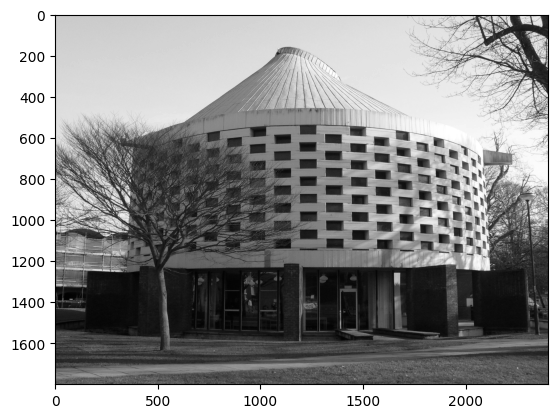

In [3]:
# Load the data
img = cv2.imread('./meeting_house.jpg')

# Fill in the second half of the print statements
print('image object type is:', type(img))
print('image data type is:', img.dtype)
print('image shape is:', img.shape)

# Next display the image
plt.imshow(img)
# Convert it to grayscale using np
gray_img = np.dot(img[...,:3], [0.2989, 0.5870, 0.1140])
# [...,:3] just slices the array
# ... (ellipsis) means to include all dimensions of the array (thus, all rows and columns)
# :3 refers to the first 3 elements along the last axis of the RGB image
# the values are for converting rgb to grayscale
# np.dot() for matrix muliplication

# Display the grayscale image
plt.imshow(gray_img, cmap='gray')
# cmap='gray' is for the colormap, if your changed 'gray' to 'Greens' it would change.


# Further visualisation
Did you notice anything different about the colour image you plotted before?

You'll see that the colors are off - this is because OpenCV uses a BGR ordering of their image channels, whereas when you want to plot in something other than OpenCV, you'll need to convert it. In Colab, you cannot use the standard OpenCV 'imshow' function, so we use matplotlib.

+ We can convert from BGR to RGB using [these OpenCV functions](https://docs.opencv.org/4.x/df/d9d/tutorial_py_colorspaces.html)
+ We can also do the same thing using numpy indexing (see [the docs](https://numpy.org/doc/stable/user/basics.indexing.html#basics-indexing) and [also](https://numpy.org/doc/stable/reference/arrays.indexing.html)). There's a neat trick for reversing arrays by indexing the final dimension with '::-1'. Try and work out what this means and check it works by plotting the images.
+ Another neat thing you can do with numpy is to halve the spatial image resolution (subsample by a factor of 2). Again this uses array indexing, this time for the rows, cols indices use '::2'. Note you can also change image sizes using [opencv](https://docs.opencv.org/4.x/da/d6e/tutorial_py_geometric_transformations.html). Try lowering the resolution further, how does the image change?



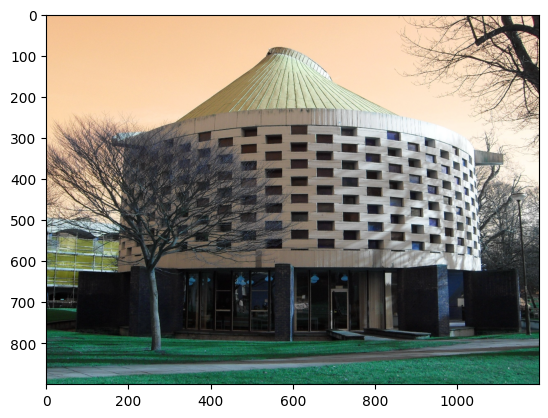

In [4]:
import cv2 as cv
# Convert from BGR to RGB
dst = cv2.cvtColor(img, cv.COLOR_BGR2RGB)
# dst = cv2.cvtColor(src, code) is how you do it. The specific code for converting bgr to rgb is that one.
# You can find more possibilities here: https://docs.opencv.org/3.4.0/d7/d1b/group__imgproc__misc.html#ga4e0972be5de079fed4e3a10e24ef5ef0
plt.imshow(dst)
# Convert from BGR to RGB using numpy, the ::-1 corresponds to loop over the whole set of indicies backwards
newrgb = img[...,::-1] # You just invert the pixels and make sure to include '...' to include all dimensions of the array.
plt.imshow(newrgb)
# Halve the spatial resolution by sampling every other pixel.
less_resolution = img[::2,::2,:] # Ofc this is array slicing.
# The syntax is [start:stop:step] If you omit start and use ':' instead, it takes into consideration all pixels since the beginning of the dimension (width or height)
# If you omit stop and just use a colon ':', it considers all pixels until the end. By putting '2' as step, you halve the resolution. You can use other numbers too.
# You do '::2' once for the first dimension. You do '::2' once again for the second dimension.
# The last ':' accounts for the third (the colors) dimensions, and it means to include all that are used in the image.
plt.imshow(less_resolution)

# Image co-ordinate system
Matplotlib allows us to plot lines, and points on top of the image. This can be very useful to convey information about where things are.

+ Experiment with plotting points on top of the image using [plt.scatter](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html). What do you notice about the coordinate system? Can you change the size/shape of what you're plotting?

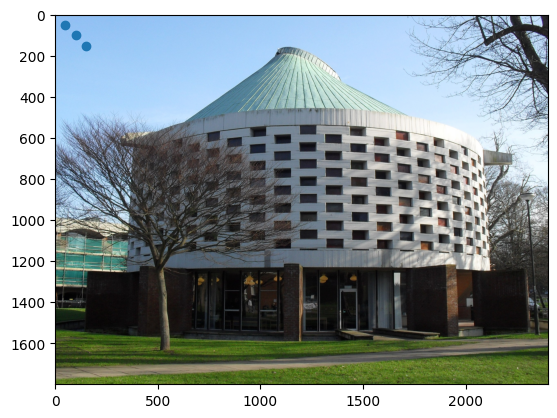

In [5]:
# Draw the rgb image

# Original thingy matplotlib.pyplot.scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, *, edgecolors=None, plotnonfinite=False, data=None, **kwargs)[source]

plt.imshow(newrgb)

x = [50, 100, 150]  # X-coordinates
y = [50, 100, 150]  # Y-coordinates

plt.scatter(x, y)

plt.show()
# Draw some points on top using scatter


# Manipulating Image Pixels
Let's try making some changes to the images, and see how that affects things. For each of the edits, try not to overwrite the original image data (why not?). Remember assignment in Python is by reference! If you want to make a copy of a numpy object use [np.copy](https://numpy.org/doc/stable/reference/generated/numpy.copy.html) to do a [deepcopy](https://docs.python.org/3/library/copy.html)

1. Manipulate the colour of specific pixels, or ranges of pixels. Note the [different mechanisms for slicing through Python arrays](https://numpy.org/doc/stable/user/basics.indexing.html#basics-indexing) and [also](https://numpy.org/doc/stable/reference/arrays.indexing.html).

1. Threshold the image using numpy, there's a useful function called [clip](https://numpy.org/doc/stable/reference/generated/numpy.clip.html)

1. Try inceasing the brightness of the image by multiplication (note that you should keep it within the original range of values using clip). **watch out for overflow (as the data is uint8). You might want to cast it to something else to avoid this**

1. Try modifying the brightness of just the left side of the image, hint use range indexing.

1. What do the comparison operators such as '>' return when applied to an array?


comparisons return an array of type:  bool


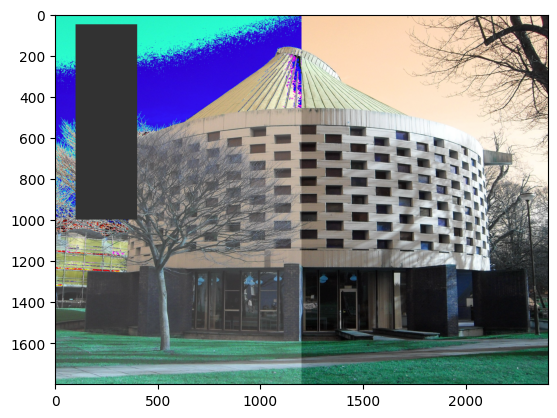

In [27]:
new_img = np.copy(img)

# Manipulate the colour of specific pixels

new_img[50:1000, 100:400] = (0, 0, 0) # (0, 0, 0) sets it to black.
plt.imshow(new_img)

# Threshold the image using numpy's clip function
clipImage =np.clip(new_img, 0, 100)
plt.imshow(clipImage)


# When we plot the image tell matplotlib what the min/max values to plot between are (0,255) with vmin=0, vmax=255)
plt.imshow(new_img, vmin=0, vmax=255)

# Increase the image brightness and clip to keep in the correct range.
bright_img = np.copy(new_img)
bright_img += 50
plt.imshow(bright_img)


# Increase the brightness of the left side of the image. Copy the image first!
img_lbright = np.copy(new_img)
midpoint = img_lbright.shape[1] // 2
img_lbright[:, :midpoint, :] += 50
plt.imshow(img_lbright)



# Check the type of the array after applying a comparison operator
compa = img_lbright > 128
compaa = compa.dtype

print('comparisons return an array of type: ', compaa)

# Extensions
You don't have to do these, but if you complete the lab and want to learn more then give these a go! You also don't need to do them in any particular order.
+ Can we clip the value of an image using '>' and array indexing?
+ Draw each of the colour channels separately in the right colours. hint: Create a new image to draw each colour channel using [np.zeros_like](https://numpy.org/doc/stable/reference/generated/numpy.zeros_like.html) and use matpltolib's [subplot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplot.html) functionality.
+ Make just the centre of the image grayscale (hint: remember you can assign to array slices)